In [2]:
import numpy as np
import matplotlib.pyplot as plt
from skimage import io
from skimage.measure import compare_psnr
%matplotlib inline

In [3]:
def konvolusi2d(image, kernel):
    kernel = np.flipud(np.fliplr(kernel))
    output = np.zeros_like(image)
    
    # tambahkan zero-padding
    padding = np.zeros((image.shape[0] + 2, image.shape[1] + 2))
    padding[1:-1, 1:-1] = image
    for x in range(image.shape[1]):
        for y in range(image.shape[0]):
            output[y,x] = (kernel*padding[y:y+3, x:x+3]).sum()
    return output

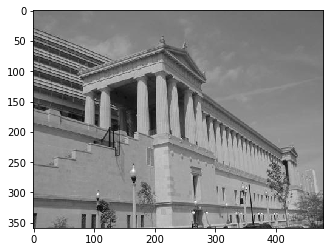

In [4]:
image_ori = io.imread('stone.jpg')
plt.imshow(image_ori, cmap='gray')

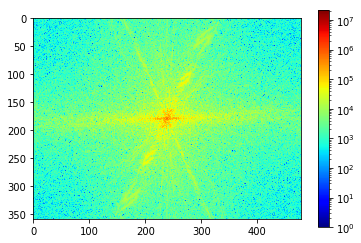

In [17]:
image_freq = np.fft.fft2(image_ori)
from matplotlib.colors import LogNorm
shift_image_freq = np.fft.fftshift(image_freq)
plt.imshow(np.abs(shift_image_freq), norm=LogNorm(vmin=1), cmap='jet')
plt.colorbar()

In [6]:
kernel = np.array([[1/9,1/9,1/9],[1/9,1/9,1/9],[1/9,1/9,1/9]])
kernel

array([[0.11111111, 0.11111111, 0.11111111],
       [0.11111111, 0.11111111, 0.11111111],
       [0.11111111, 0.11111111, 0.11111111]])

In [7]:
image_konvolusi = konvolusi2d(image_ori,kernel)

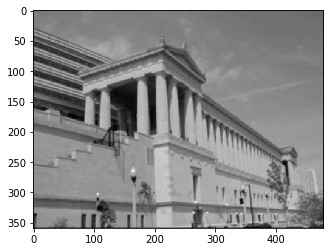

In [8]:
plt.imshow(image_konvolusi, cmap='gray')

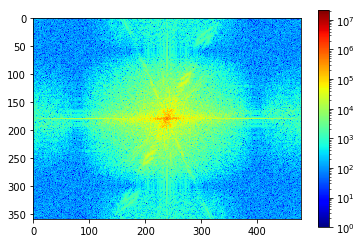

In [18]:
image_konvolusi_freq = np.fft.fft2(image_konvolusi)
shift_image_konvolusi_freq = np.fft.fftshift(image_konvolusi_freq)
plt.imshow(np.abs(shift_image_konvolusi_freq), norm=LogNorm(vmin=1), cmap='jet')
plt.colorbar()

In [35]:
#slice matriks
image_konvolusi_slice = image_konvolusi[::2,::2]

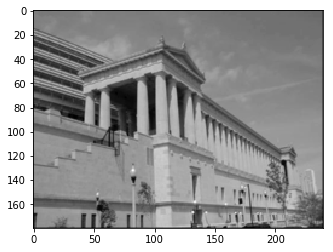

In [36]:
plt.imshow(image_konvolusi_slice, cmap='gray')

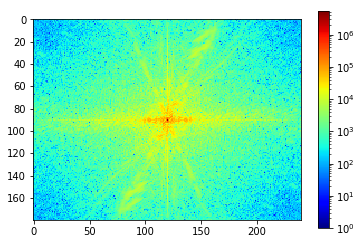

In [37]:
image_konvolusi_slice_freq = np.fft.fft2(image_konvolusi_slice)
shift_image_konvolusi_slice_freq = np.fft.fftshift(image_konvolusi_slice_freq)
plt.imshow(np.abs(shift_image_konvolusi_slice_freq), norm=LogNorm(vmin=1), cmap='jet')
plt.colorbar()

In [11]:
m,n = image_konvolusi_slice.shape
out = np.zeros((2*m-1,2*n-1), dtype='uint8')
out[::2,::2] = image_konvolusi_slice
print(image_konvolusi_slice)
print(out.shape)

[[ 53  81  81 ...  70  70  47]
 [ 82 124 124 ... 106 106  70]
 [ 83 125 124 ... 107 107  71]
 ...
 [ 37  68 104 ...  66  64  40]
 [ 37  73 108 ...  56  57  39]
 [ 25  53  74 ...  40  40  26]]
(359, 479)


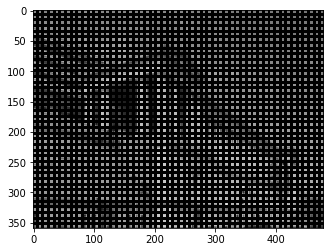

In [12]:
plt.imshow(out, cmap='gray')

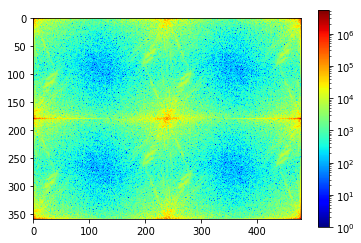

In [28]:
image_out_freq = np.fft.fft2(out)
shift_image_out = np.fft.fftshift(image_out_freq)
plt.imshow(np.abs(shift_image_out), norm=LogNorm(vmin=1), cmap='jet')
plt.colorbar()

In [29]:
filtering = np.array([[0.25,0.5,0.25],[0.5,1,0.5],[0.25,0.5,0.25]])
image_recover = konvolusi2d(out,filtering)

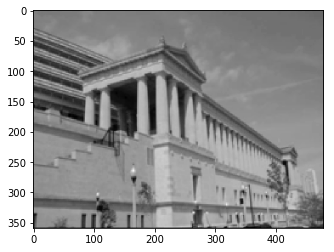

In [30]:
plt.imshow(image_recover, cmap='gray')

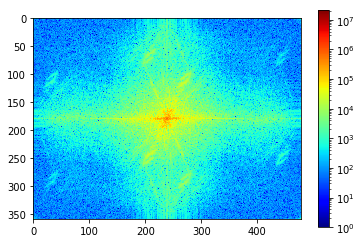

In [31]:
image_recover_freq = np.fft.fft2(image_recover)
shift_image_recover = np.fft.fftshift(image_recover_freq)
plt.imshow(np.abs(shift_image_recover), norm=LogNorm(vmin=1), cmap='jet')
plt.colorbar()

In [15]:
psnr = compare_psnr(image_ori,image_recover)
psnr

27.278243716772344